## Title: Spectral Analysis

### Author: Chris Hyland

Date: 16-11-2018

Analysing the spectral components of a time series.

#### Motivation

We can represent any time series in the frequency domain in order to analyse any seasonal components of the data. In particular, as the autocovariance function of a covariance stationary process is one representation of the data, the spectral analysis provides an alternative form.

This alternative formulation allows us to view the data in a different light. Here, we use the [Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) and its inverse to switch back and forth between the 2 representations.

Suppose we have a real-valued stochastic process $\{X_t\}$ that is _covariance stationary_. From this, we can invoke [Wold's Decomposition theorem](https://en.wikipedia.org/wiki/Wold%27s_theorem) that every zero-mean covariance stationary process can be decomposed into a deterministic component $\eta_t$ and sequence of innovations (white noise) with a [linear filter](https://en.wikipedia.org/wiki/Linear_filter) applied to it.

$$
X_t = \eta_t + \sum_{j=0}^{\infty}\phi_j\epsilon_{t-j}
$$

#### Spectral Density

Let $\{X_t\}$ be a covariance stationary process. The spectral density _f_ of $\{X_t\}$ is defined as the discrete time fourier transform of the autocovariance function $\gamma$

$$
f(\omega) = \sum_{k \in \mathbb{Z}}\gamma(k)e^{-i \omega k}
$$

for $\omega \in \mathbb{R}$. We can express this easily as 


$$
f(\omega) = \gamma(0) + 2\sum_{k \geq 1}\gamma(k)cos(\omega k)
$$

where _f_ is 

- Even function
- Real valued
- $2\pi$ periodic.

From this, all values of f over $\mathbb{R}$ can in fact be determined from all values of f over the interval $[0,\pi]$. Hence we only need to restrict our analysis to this interval.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Aggregated store data by state

In [3]:
# product_of_interest = [1111087398, 1111087395, 1111087396]
train_data = pd.read_csv('../../intellify_data/Train_state_pizza_aggregate.csv')
val_data = pd.read_csv('../../intellify_data/Val_state_pizza_aggregate.csv')

train_data = train_data.set_index("Date")
val_data = val_data.set_index("Date")

# Data was split up so we bring them back together.
data = pd.concat([train_data,val_data])

### Autocovariance

The first step involved is to compute the autocovariance of the system

In [20]:
import statsmodels.tsa.stattools
from pandas.tools.plotting import autocorrelation_plot

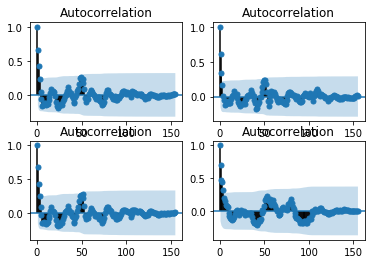

In [38]:
"""
Plot autocorrelation of data.
"""

fig, ax = plt.subplots(nrows=2, ncols=2)

one = plot_acf(data["Prod_KY"], ax=ax[0,0])
two = plot_acf(data["Prod_IN"], ax=ax[0,1])
three = plot_acf(data["Prod_OH"], ax=ax[1,0])
four = plot_acf(data["Prod_TX"], ax=ax[1,1])

plt.show()

### Nonparametric Estimation

Recall our formula for the spectral estimation from earlier. A way to actually estimate the spectrum using a naive approach is

$$
\hat{S}(\omega) = \hat{\gamma}(0) + 2 \sum_{k=1}^{T-1}\hat{\gamma}(k)cos(\omega k)
$$

(Note that the reason that this is a bad estimator is the fact that $\hat{\gamma}(k)$ has less and less observations to work with to estimate as $k \rightarrow T$.

In [51]:
import seaborn as sns
sns.set()

def non_par_spec(autocov):
    """
    Non-parametric estimation and plot of the spectrum using the above formula.
    """
    auto_values = []
    
    # Generate frequencies to analyse.
    omega_grid = np.linspace(0, 2*np.pi)
    time = range(0, len(autocov))
    
    for omega in omega_grid:
        sum_auto = autocov[0]
        for k in time:
            sum_auto += autocov[k]*np.cos(omega*k)
        auto_values.append(sum_auto)
    sns.lineplot(omega_grid, auto_values).set_title("Spectrum Density")

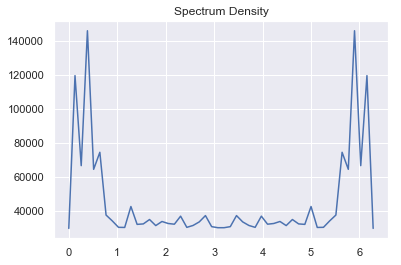

In [52]:
from statsmodels.tsa.stattools import acovf


non_par_spec(acovf(data["Prod_KY"]))

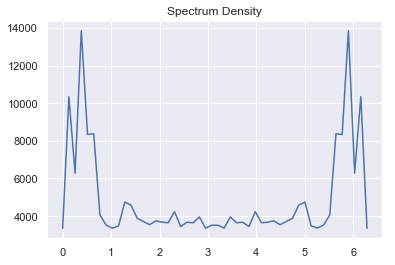

In [56]:
non_par_spec(acovf(data["Prod_IN"]))

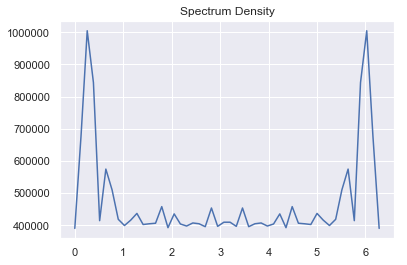

In [57]:
non_par_spec(acovf(data["Prod_TX"]))

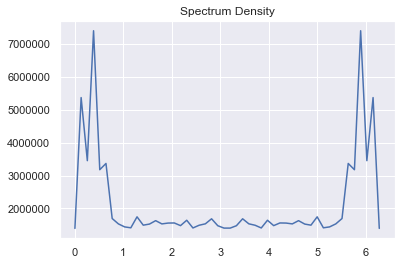

In [58]:
non_par_spec(acovf(data["Prod_OH"]))

When analysing spectral densities, you have spectral densities as being large at values of $\omega \in [0, \pi]$ at which the autocovariance function seems approximately to exhibit big damped cycles.

Unfortunately, there doesn't seem to be much in terms of cycles in the dataset.